In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import altair as alt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
data = pd.read_csv('https://raw.githubusercontent.com/pomeloywu/NLP/main/Data/data_processed.csv')
data.isnull().any()
data[data['clean_title'].isna()].groupby('genre').count()
data.dropna(inplace=True)

In [3]:
data['class'] = LabelEncoder().fit_transform(data['genre'])
class_map = dict(zip(data['class'], data['genre']))
data['all_words'] = data['clean_text'].apply(lambda x: x.split())
data['word_length'] = data['all_words'].apply(lambda x: len(x))
print(class_map)
data.head(10)

{1: 'fantasy', 4: 'science', 0: 'crime', 2: 'history', 3: 'horror', 5: 'thriller'}


,title,genre,summary,clean_text,clean_title,class,all_words,word_length
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drown wednesday first trustee among morrow day...,drown wednesday,1,"[drown, wednesday, first, trustee, among, morr...",437
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,lose hero,1,"[book, open, jason, awakens, school, bus, unab...",293
2,Thendara House,fantasy,The novel concerns the dwelling of the Darkov...,novel concern dwell darkovan order renunciates...,thendara house,1,"[novel, concern, dwell, darkovan, order, renun...",20
3,The Thief,fantasy,"Gen is released from prison by the magus, the...",gen release prison magus king scholar magus fi...,thief,1,"[gen, release, prison, magus, king, scholar, m...",90
4,The Sweet Far Thing,fantasy,The prologue begins with two men who are sear...,prologue begin two men search river london thr...,sweet far thing,1,"[prologue, begin, two, men, search, river, lon...",520
5,Mistborn: The Final Empire,fantasy,"In Luthadel, the capital city of the Final Em...",luthadel capital city final empire vin scrawny...,mistborn final empire,1,"[luthadel, capital, city, final, empire, vin, ...",279
6,The Sorcerer's Ship,fantasy,A man named Gene finds himself cast into a ne...,man name gene find cast new world powerful god...,sorcerer ship,1,"[man, name, gene, find, cast, new, world, powe...",85
7,The Woman Who Rides Like a Man,fantasy,The third book sees Alanna through her journe...,third book see alanna journey bazhir desert ma...,woman ride like man,1,"[third, book, see, alanna, journey, bazhir, de...",325
8,Dragon Rider,fantasy,"As the novel begins, a dragon clan receives w...",novel begin dragon clan receive word rat name ...,dragon rider,1,"[novel, begin, dragon, clan, receive, word, ra...",889
9,Darkwalker on Moonshae,fantasy,The novel and its trilogy use the Moonshae Is...,novel trilogy use moonshae isle set kazgoroth ...,darkwalker moonshae,1,"[novel, trilogy, use, moonshae, isle, set, kaz...",110


In [5]:
raw_input = data['all_words'].tolist()
total_corpus = np.unique(np.concatenate(raw_input))
print(f'Total number of words in the corpus: {len(total_corpus)}.')

Total number of words in the corpus: 40091.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[['clean_text', 'clean_title','all_words']],
                                                   data['class'], random_state = 42,
                                                   test_size = 0.2, stratify=data['class'])
print(f'The number of training samples is: {len(X_train)}')
print(f'The number of testing samples is: {len(X_test)}')                                                                                    

The number of training samples is: 2392
The number of testing samples is: 599


In [7]:
count_vect = CountVectorizer()
X_train_countvec = count_vect.fit_transform(list(X_train.clean_text)).toarray()
X_test_countvec = count_vect.transform(list(X_test.clean_text)).toarray()

In [8]:
clf = MultinomialNB().fit(X_train_countvec, y_train)

In [9]:
df = pd.DataFrame(clf.feature_count_, columns=count_vect.get_feature_names())
weight_matrix = clf.feature_count_/clf.feature_count_.sum(axis=1)[:, np.newaxis]
df.head(6)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aann,aari,aaron,aba,aback,abacus,abaddon,abagail,abandon,...,பதனம,யவன,ரண,พธเพชฌฆาต,ฮารลาน,แกลง,โคเบน,リングワールドの子供たち,死亡審判,鬼不理的助手
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,21.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,6.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,31.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,27.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X, y = data[['clean_text', 'clean_title','all_words']], data['class']

In [26]:
train_vect = CountVectorizer()
train_countvec = train_vect.fit_transform(list(X.clean_text)).toarray()
total_clf = MultinomialNB().fit(train_countvec, y)

In [27]:
total_df = pd.DataFrame(total_clf.feature_count_, columns=train_vect.get_feature_names())
total_weight_matrix = total_clf.feature_count_/total_clf.feature_count_.sum(axis=1)[:, np.newaxis]
total_df.head(6)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aames,aann,aari,aaron,aba,aback,abacus,abaddon,abagail,...,ரண,พธเพชฌฆาต,ฮารลาน,แกลง,โคเบน,⁹⁹,リングワールドの子供たち,死亡審判,火車,鬼不理的助手
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,6.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_pred = clf.predict(X_test_countvec)
compare_prediction = pd.DataFrame({"Categories":y_test.map(lambda x: class_map.get(x)).tolist(),"actual":y_test,"predicted":y_pred})
compare_prediction ["correct"] = np.equal(compare_prediction .actual,compare_prediction.predicted)
print(compare_prediction ['correct'].value_counts()/len(compare_prediction ))
accuracy_by_domain = compare_prediction.groupby('Categories').apply(lambda grp: np.sum(grp.correct)/len(grp))
accuracy_by_domain

In [11]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
#print(unique_elements,counts_elements)
topic_dist = counts_elements/sum(counts_elements)
category_dict = dict(zip(unique_elements, topic_dist))
print(category_dict)

{0: 0.1669449081803005, 1: 0.11352253756260434, 2: 0.19365609348914858, 3: 0.20868113522537562, 4: 0.15525876460767946, 5: 0.16193656093489148}


In [91]:
def generate_data(corpus,beta,alpha,possion):
    x = np.random.poisson(possion) 
    topic = np.random.choice(6,p=alpha) # generate topic proportion 
    v = np.shape(beta)[0]
    topic_list = np.random.choice(range(v),x,p=alpha) #sample from topic proportion
    word = list(map(lambda topic_index: np.random.choice(corpus,p=beta[topic_index]),topic_list))
    cat = np.bincount(topic_list).argmax()
    return (cat,word)

In [92]:
data_size = 50
vocabulary= train_vect.get_feature_names()
alpha = topic_dist
beta = total_weight_matrix
possion = np.median(data['word_length'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
gen_data = [generate_data(vocabulary,beta,alpha,possion) for i in range(data_size)]

In [86]:
total_df = pd.DataFrame(gen_data,columns=['Categories','Summary'])
total_df.Summary = total_df.Summary.map(lambda a: " ".join(a))

In [87]:
total_df.to_csv("/Users/wuyuyou/Desktop/NLP/mockdata_nb.csv",index=False)
total_df['Genre'] = total_df['Categories'].map(lambda x: class_map.get(x))
total_df.groupby("Categories").count()
total_df.sample(20)

,Categories,Summary,Genre
20,3,clifford cancer pod guest middle woman leave h...,horror
26,5,treatise carry end non aleksandr marry danny s...,thriller
29,0,justice mostin bhattacharya thorn treasure for...,crime
25,3,entire day stir offer visit assessment exorcis...,horror
27,3,invitation may steal several mercot six cottag...,horror
33,3,innocence prevent australia personal robbie lo...,horror
32,2,druss dub may cause bill show school friar lea...,history
2,3,dora world vow town return erik deliberately g...,horror
35,3,illegal number point privateer racial departme...,horror
16,2,krsh deject allow natural hunt reveal child ho...,history


In [94]:
from sklearn.metrics import classification_report
print(classification_report(compare_prediction.actual, compare_prediction.predicted))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       100
           1       0.90      0.61      0.73       100
           2       0.72      0.83      0.77       100
           3       0.57      0.72      0.63        99
           4       0.86      0.80      0.83       100
           5       0.65      0.63      0.64       100

    accuracy                           0.72       599
   macro avg       0.74      0.72      0.72       599
weighted avg       0.74      0.72      0.72       599



In [88]:
new_text_countvec = train_vect.transform(list(total_df.Summary)).toarray()
new_y_pred = total_clf.predict(new_text_countvec)

In [ ]:
new_compare_prediction = pd.DataFrame({"Categories":total_df['Genre'],"actual":total_df['Categories'],"predicted":new_y_pred})
new_compare_prediction["correct"] = np.equal(new_compare_prediction.actual,new_compare_prediction.predicted)
print(new_compare_prediction['correct'].value_counts()/len(new_compare_prediction))
accuracy_by_domain = new_compare_prediction.groupby('Categories').apply(lambda grp: np.sum(grp.correct)/len(grp))
accuracy_by_domain

### Other potential solutions (Unused in report)

In [162]:
# from sklearn.pipeline import make_pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vector = TfidfVectorizer()
# X_train_tfidf = tfidf_vector.fit_transform(list(X_train.clean_text))
# X_test_tfidf = tfidf_vector.transform(list(X_test.clean_text))
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train_tfidf, y_train)
# y_pred = clf.predict(X_test_tfidf)
# from sklearn.metrics import confusion_matrix
# #%pip install seaborn
# import seaborn as sns
# from seaborn import heatmap
# mat = confusion_matrix(y_train.tolist(), y_pred.tolist())
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=y_train, yticklabels=y_train)
# plt.xlabel('true label')
# plt.ylabel('predicted label')

<BarContainer object of 6 artists>

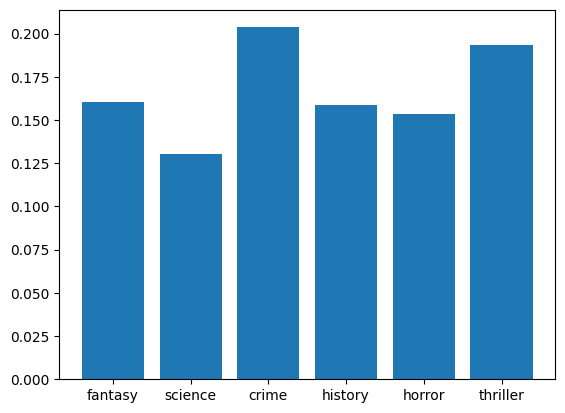

In [282]:
plt.bar(genre_map.values(), topic_dist)

In [251]:
# data_size = 200
# sen_length = np.median(data.word_length)
# all_words = X_train['all_words'].tolist()
# total_corpus = np.unique(np.concatenate(all_words))
# print(f'Total number of words in the corpus: {len(np.unique(total_corpus))}.')
# base_dict = clf.feature_count_

In [ ]:
# newdata = pd.read_csv("https://raw.githubusercontent.com/pomeloywu/NLP/main/mockdata.csv")
# new_x_test = newdata[['Summary','genre']]
# new_x_test['clean_text'] = new_x_test['Summary'].apply(lambda x: x.split())
# print(type(new_x_test))
# new_x_test_countvec = count_vect.transform(list(new_x_test.clean_text)).toarray()

In [ ]:
# new_y_pred = clf.predict(new_x_test_countvec)
# newdata["Prediction"] = new_y_pred
# newdata
# new_predict_compare_train = pd.DataFrame({"Domain":newdata['Genre'],"actual":newdata['Domain'],"predicted":new_y_pred})
# new_predict_compare_train["correct"] = np.equal(new_predict_compare_train.actual,new_predict_compare_train.predicted)
# new_accuracy_train = np.sum(new_predict_compare_train['correct'])/len(new_predict_compare_train)
# print("accuracy:", new_accuracy_train)
# new_accuracy_by_domain_train = new_predict_compare_train.groupby('Domain').apply(lambda grp: np.sum(grp.correct)/len(grp))
# new_accuracy_by_domain_train

In [252]:
# random.seed(100)
# # Generate random topic based on the distribution
# topic_array = np.random.choice(6, data_size, p=topic_dist)
# # Random Choice for words
# word_array = np.random.choice(len(count_vect.get_feature_names()),data_size)
# std = np.std(data.word_length)
# mu = np.mean(data.word_length)
# low = np.min(data.word_length)
# high = np.max(data.word_length)
# sen_length = np.random.randint(0, mu+std, data_size).astype(int)
#sen_length = np.random.randint(low, high, data_size).astype(int)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [285]:
# prob_matrix = weight_matrix+topic_dist.reshape(6,1)
# normalized_prob_matrix = prob_matrix/prob_matrix.sum(axis=1)[:, np.newaxis]
# normalized_prob_matrix
# test_matrix = weight_matrix/weight_matrix.sum(axis=1)[:, np.newaxis]

In [286]:
# low = np.min(data.word_length)
# high = np.max(data.word_length)
# data_size = 20
# data_set = []
# topic_list = []
# for i in range(data_size):
#     num_words = np.random.randint(low,high)
#     sentence = []
#     topic = np.random.randint(6)
#     topic_list.append(topic)
#     for j in range(num_words):
#         word = random.choices(count_vect.get_feature_names(), weights=test_matrix[topic,:])[0]
#         sentence.append(word)
#     data_set.append(sentence)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
